***CSE482 Exercise 2***

**Question 1**

✅Yes, they are in the same folder.

In [1]:
import pandas as pd
data = pd.read_table('wiki_edit.txt',sep=' ',header=None,names=['RevisionId', 'ArticleName', 'Timestamp', 'Editor'])
data.head()

wiki = data

*Question 2*

a)

✅Connected.

b)

In [2]:
uname = "liutia18"
pwd = "xxxxxx"#deleated after successful running
hname = "mysql-user-cse.egr.msu.edu"

In [3]:
import mysql.connector


In [4]:

from mysql.connector import errorcode



In [5]:
cnx = mysql.connector.connect(user=uname, password=pwd, host=hname, database=uname)
cursor = cnx.cursor()
query = "DROP TABLE IF EXISTS Wiki_Edit"
cursor.execute(query)

query = """CREATE TABLE IF NOT EXISTS Wiki_Edit (RevisionID int PRIMARY KEY,
                                ArticleName varchar(100),EditDate date,UserName varchar(50))
            """
cursor.execute(query)
cursor.close()
cnx.commit()
cnx.close()

✅Here are pictures for the result.

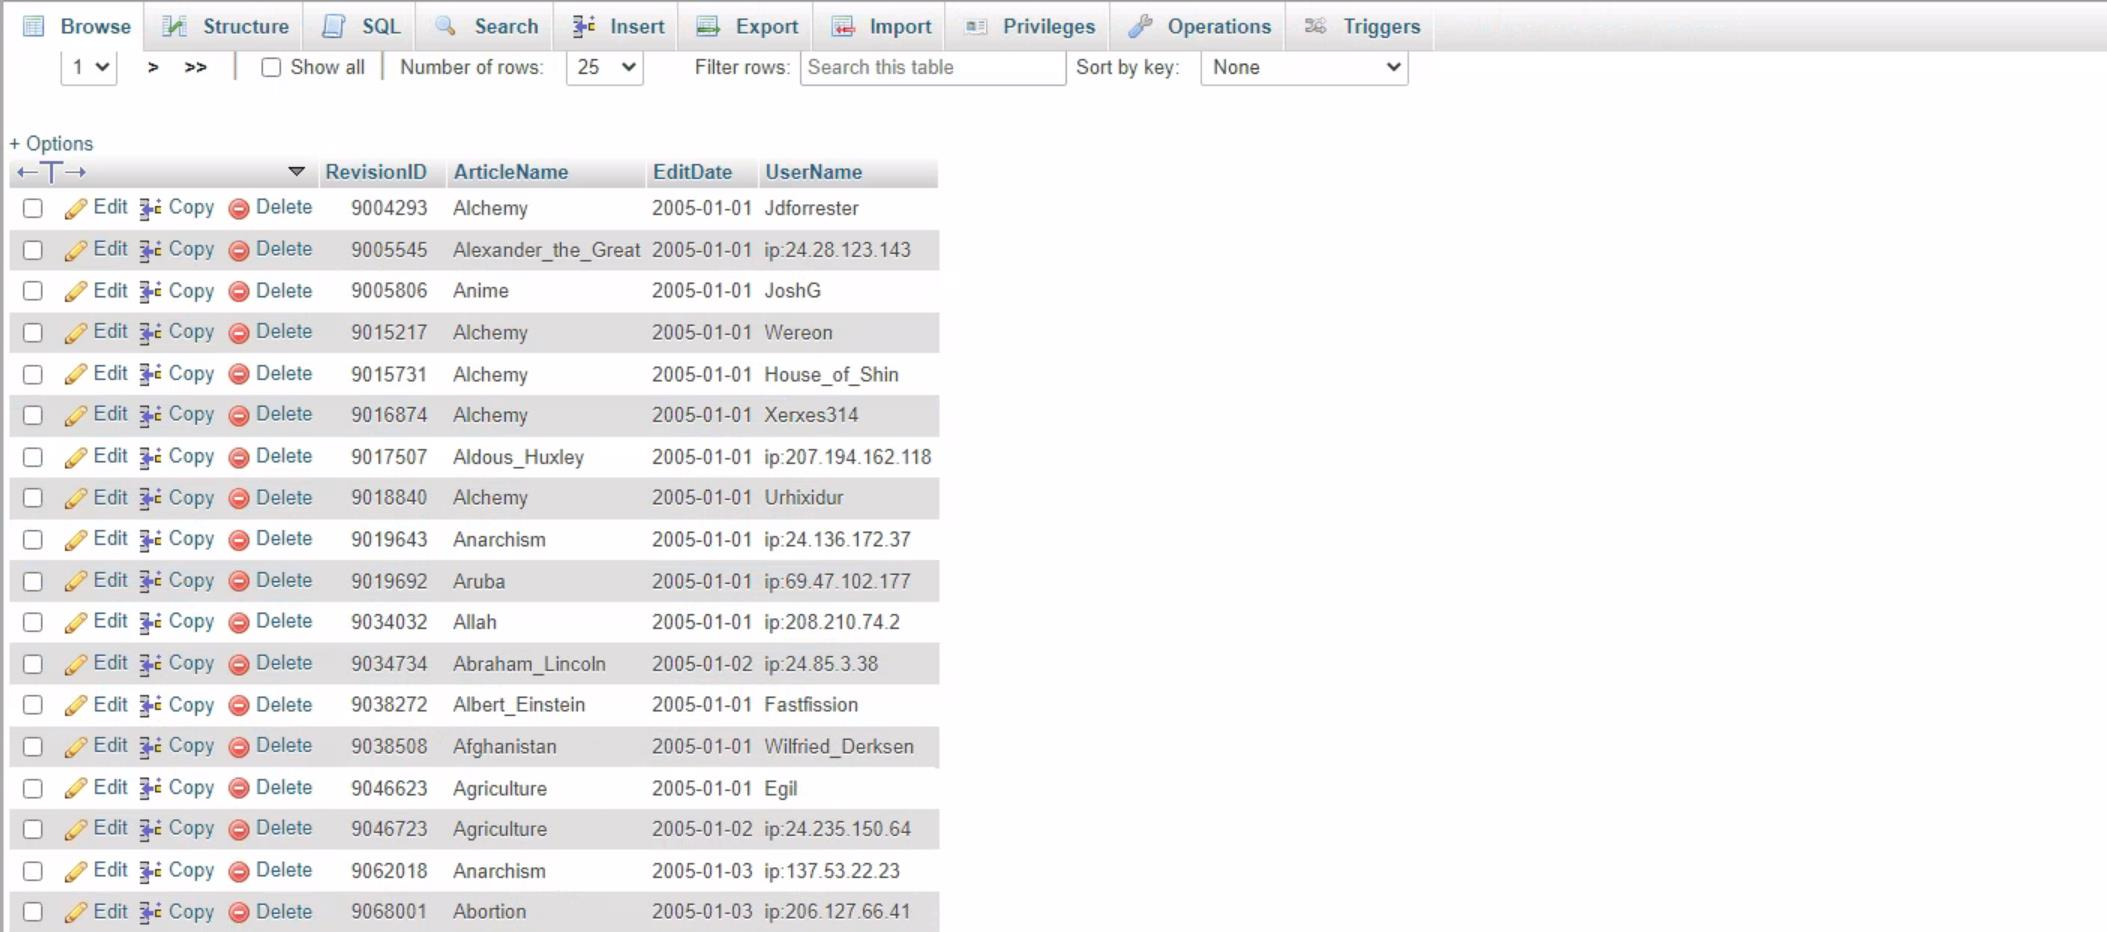

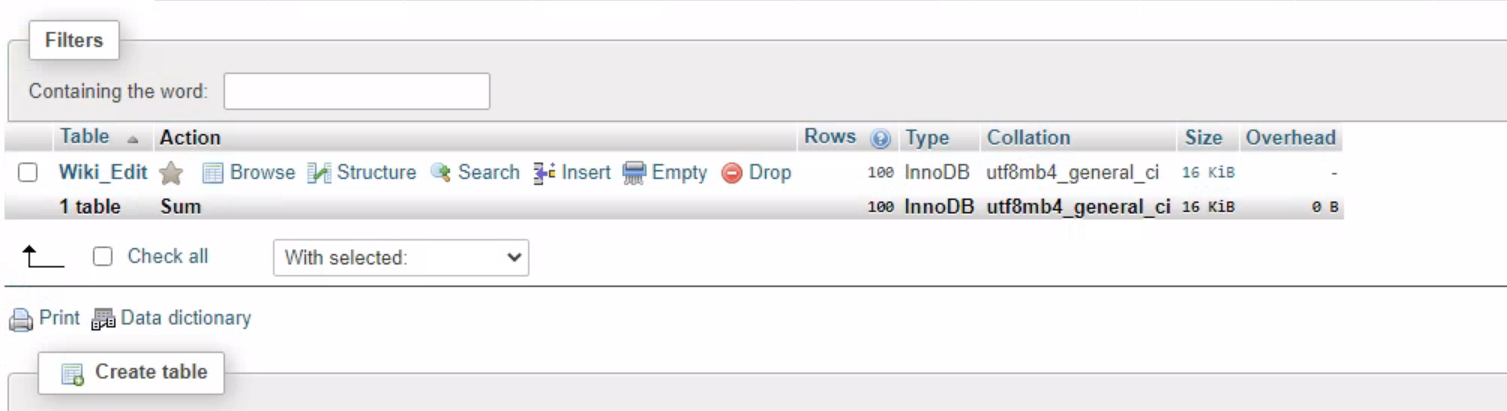

c)

In [6]:
with open("wiki_edit.txt", "r") as f:
    column_names = f.readline().strip().split(",")
    data_list = []
    for line in f:
        data_list.append(line.strip().split(","))

data_list[0:4]

[['9062018 Anarchism 2005-01-03 ip:137.53.22.23'],
 ['9085524 Anarchism 2005-01-03 ip:24.42.90.254'],
 ['9140836 Anarchism 2005-01-06 ip:69.61.184.201'],
 ['9160986 A 2005-01-06 Fvw']]

In [7]:
def byUnicode(char):
    if ord(char) < 48 or ord(char) > 127: return ''
    else: return char

try:
    cnx = mysql.connector.connect(user=uname, password=pwd, host=hname, database=uname)
    cursor = cnx.cursor()
    
    for index, row in data.iterrows():
        rid = row['RevisionId']
        Article = ''.join(list(filter(byUnicode, row['ArticleName'])))
        EditDate = row['Timestamp']
        User = row['Editor']
        if index < 100:
            query = "INSERT INTO Wiki_Edit VALUES (" + str(rid) + ",'" 
            query += Article + "','" + EditDate + "','"+ User + "')"""
            cursor.execute(query)
        
    cnx.commit()
    cursor.close()
    cnx.close()
    
except:
    print(mysql.connector.Error)

✅Answer: No error code has been printed out. The file has been filed.

d)

In [8]:
from collections import Counter
cnx = mysql.connector.connect(user=uname, password=pwd, host=hname, database=uname)
cursor = cnx.cursor()
query = "SELECT ArticleName FROM Wiki_Edit"
cursor.execute(query)

c = Counter(cursor)
print (c.most_common(1))


cursor.close()
cnx.close()

    


[(('Abraham_Lincoln',), 11)]


✅Answer: The most edited article is "Abraham_Lincoln", being edited 11 times.

**Question 3**

a)

✅Using mongo compass and it worked.

b)

✅First call the package, then set some variables for next step.

In [9]:
import pymongo

clientname = pymongo.MongoClient("mongodb://localhost:27017")#local client
dbdic = clientname["localdatabase"]#automaticly create the name in mongodb if not exist
dbdic #check what it is, for better understanding


Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'localdatabase')

In [10]:
new_file = dbdic['wiki']


In [ ]:

output = []
for i in wiki.index:
    new_row = { "RevisionID": str(wiki["RevisionId"][i]), 
               "ArticleName": wiki["ArticleName"][i], 
               "EditDate": wiki["Timestamp"][i],
               "UserName": wiki["Editor"][i]}
    output += [new_row] 
new_file.insert_many(output)


In [13]:

type(new_file)


pymongo.collection.Collection

c)

In [14]:
db_wiki = new_file

for line in db_wiki.find({"ArticleName": "Anarchism"}):
    print(line["EditDate"], line["UserName"])

2005-01-01 ip:24.136.172.37
2005-01-03 ip:137.53.22.23
2005-01-03 ip:24.42.90.254
2005-01-06 ip:69.61.184.201


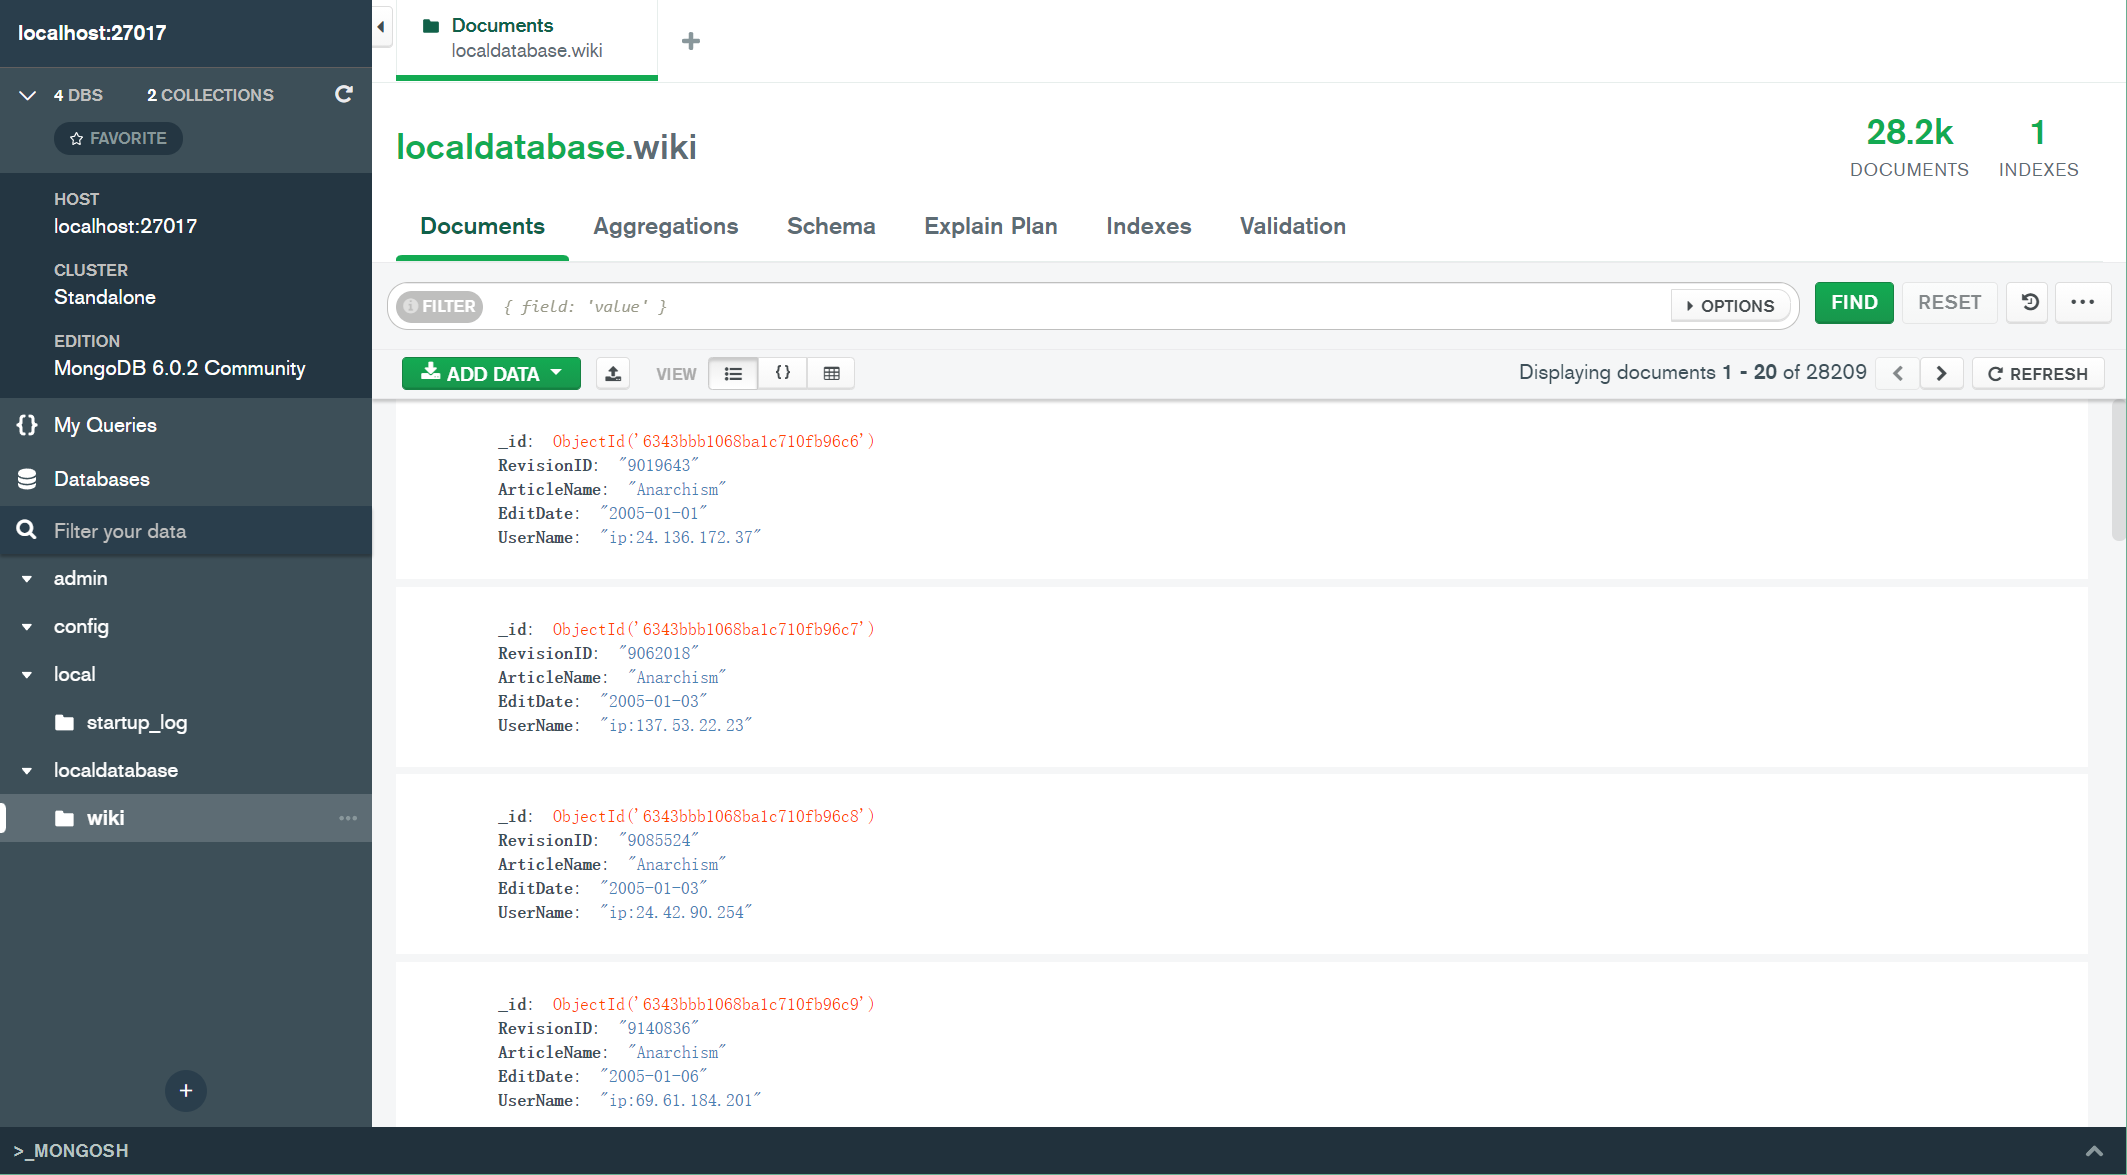

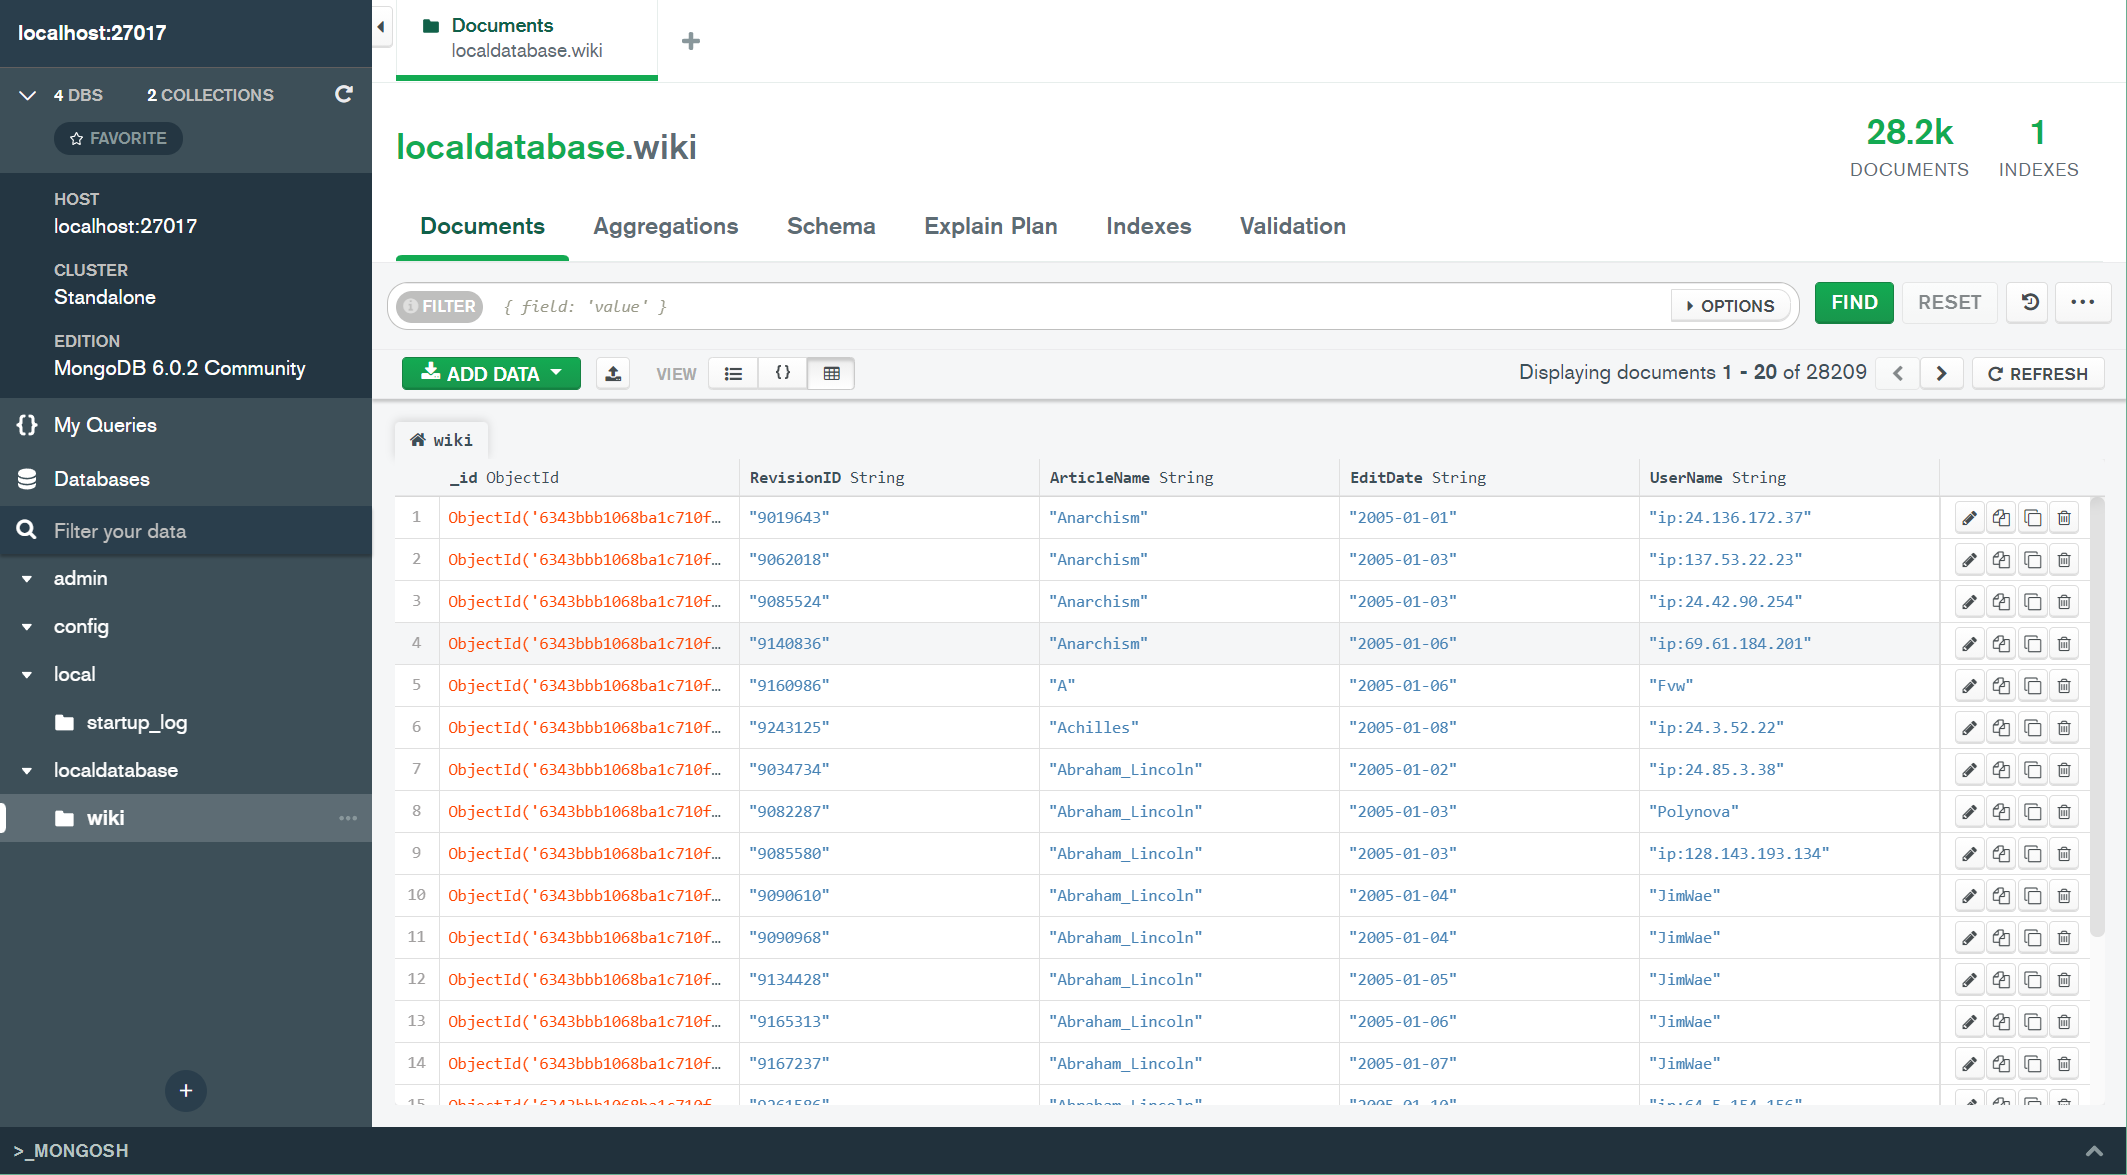